In [1]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.feature_selection import SelectKBest , f_regression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [ ]:
## Data shape size. Head (), info()-- Data types, describe ()

In [4]:
#Dataset 
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

The Dataset contains 550068 rows and 12 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
### Correctly mapped with data types

In [7]:
#Statistical Measures
## Few measures at one go
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**Insights**
* The average occupation number is 8
* The maximum occupation number is 20
* The average of the Purchase is 9263.96
* The maximum purchase is 23961.00

In [8]:
#Checking the Duplicate rows in the Dataset
df.duplicated().sum()

0

There are no Duplicated Values

# EDA

In [ ]:
## Univariate , Bivariate

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
#Analyzing the Gender Column
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

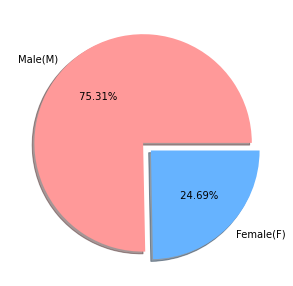

In [13]:
#Visualizing the Gender Column
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(),
       labels=['Male(M)','Female(F)'],
        autopct=' %0.2f%%',shadow=True,
        explode=(0,0.1),colors=['#ff9999','#66b3ff'])
plt.show()

**Insights**
* The Percentage of Female is 1/3 of the Total Population.

In [14]:
#Analyzing the Age Feature
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

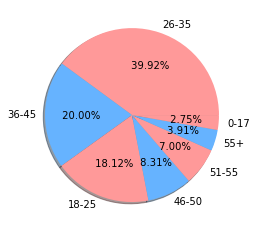

In [17]:
plt.pie(df['Age'].value_counts(),
       labels=['26-35','36-45','18-25','46-50','51-55','55+','0-17'],
        autopct=' %0.2f%%',shadow=True,
        colors=['#ff9999','#66b3ff'])
plt.show()

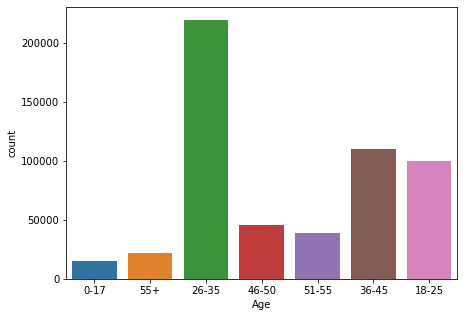

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(df['Age'])
plt.show()

**Insights**
* The Age between 26-50 are largest in numbers in the Dataset.
* The people of Age Group 0-17 and 55+ are lowest in the Dataset.

In [19]:
#Analyzing the Occupation Feature
df['Occupation'].value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

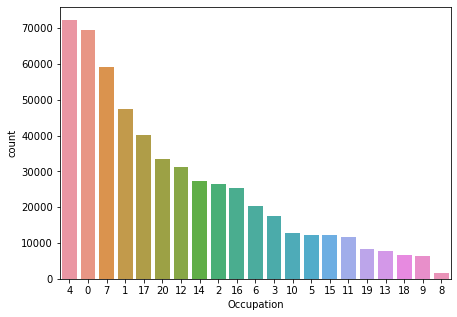

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(df['Occupation'],order=df['Occupation'].value_counts().index)
plt.show()

**Insights**
* The People having 8 occupation code are lowest in numbers.

In [21]:
#Analyzing the Martial_Status
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

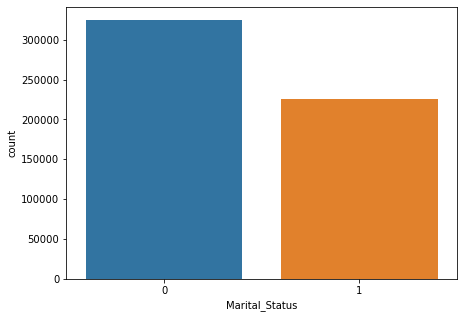

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(df['Marital_Status'])
plt.show()

* The People having no Marital_Status are more than of having Marital_Status People.

In [23]:
#Analyzing the Product_Category_1
df['Product_Category_1'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64

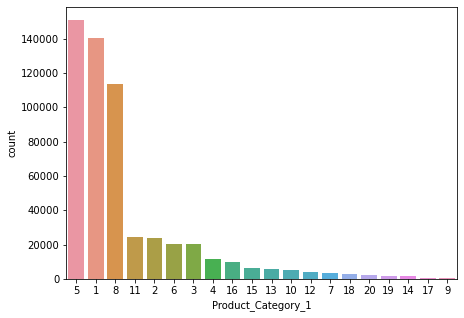

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(df['Product_Category_1'],order=df['Product_Category_1'].value_counts().index)
plt.show()

In [25]:
#Analyzing the Product_Category_2
df['Product_Category_2'].value_counts().sort_index()

2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_2, dtype: int64

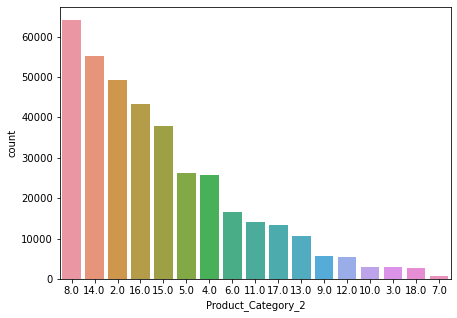

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(df['Product_Category_2'],order=df['Product_Category_2'].value_counts().index)
plt.show()

In [27]:
#Analyzing the Product_Category_3
df['Product_Category_3'].value_counts().sort_index()

3.0       613
4.0      1875
5.0     16658
6.0      4890
8.0     12562
9.0     11579
10.0     1726
11.0     1805
12.0     9246
13.0     5459
14.0    18428
15.0    28013
16.0    32636
17.0    16702
18.0     4629
Name: Product_Category_3, dtype: int64

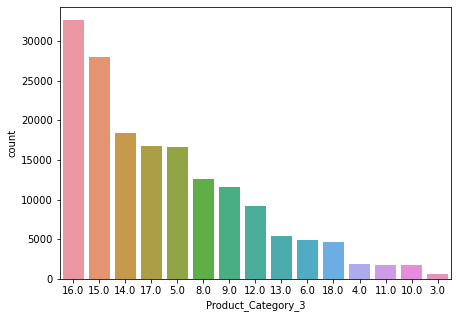

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(df['Product_Category_3'],order=df['Product_Category_3'].value_counts().index)
plt.show()

In [ ]:
#Analyzing the Purchase Column
df['Purchase'].describe()

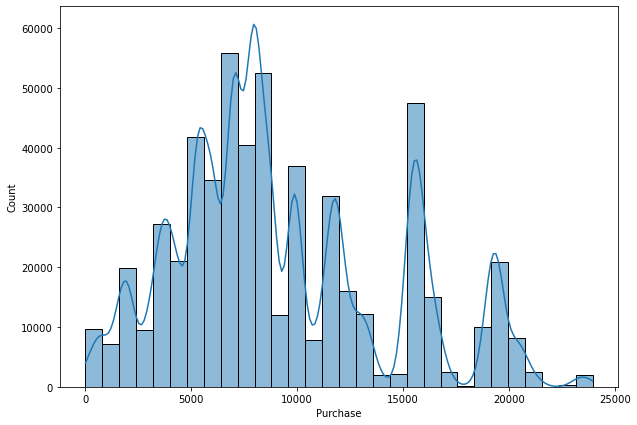

In [29]:
plt.figure(figsize=(10,7))
sns.histplot(df['Purchase'],kde=True,bins=30)
plt.show()

<AxesSubplot:xlabel='Purchase'>

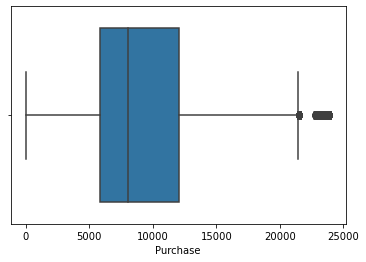

In [30]:
sns.boxplot(df['Purchase'])

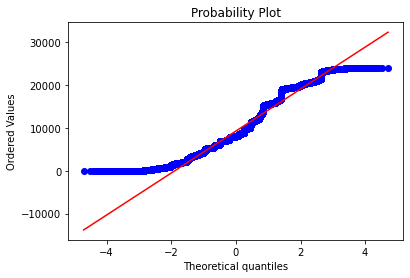

In [31]:
st.probplot(df['Purchase'],dist='norm',plot=plt);

In [32]:
#Using the Statistical Test to check whether it accepts Normal Distribution
#Shapiro Wilk Test

st.shapiro(df['Purchase'])

ShapiroResult(statistic=0.9526435732841492, pvalue=0.0)

**Insights**
* The p-Value is 0.0.
* Hence,It doesn't follow Normal Distribution.
* It contains the Outliers.

In [33]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Bi-Variate Analysis**

In [ ]:
## Taking each gender (group by), sum/count of each purchases and then plot a barplot. 

<AxesSubplot:xlabel='Gender'>

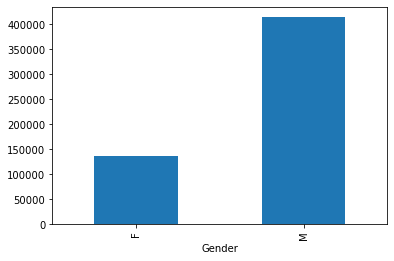

In [39]:
df.groupby('Gender')['Purchase'].count().plot(kind = 'bar')

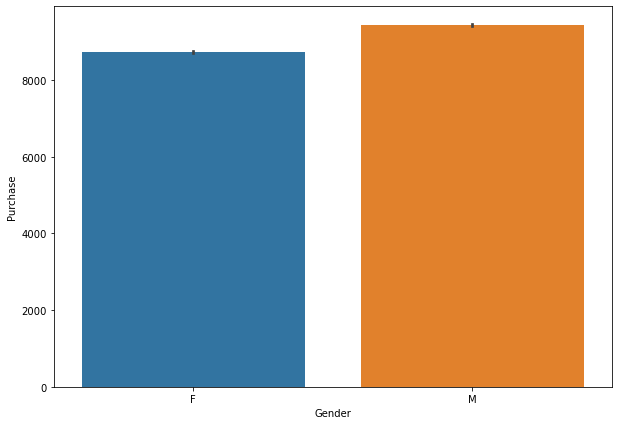

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Gender'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

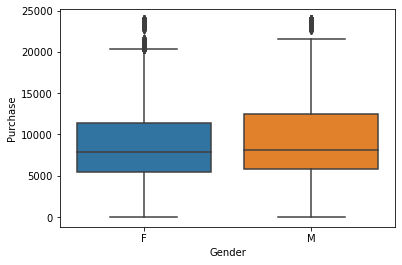

In [35]:
sns.boxplot(x=df['Gender'],y=df['Purchase'])

**Insights**
* Both Male and Female have outliers wityh respect to Purchase.
* It seems like the Median of Female and Male is almost same.
* Gender is not the Good Feature to Predict the Purchase.

In [ ]:
df.groupby('')

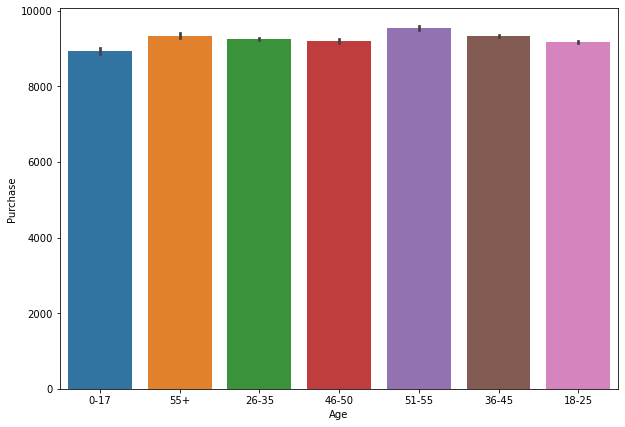

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Age'],y=df['Purchase'])
plt.show()

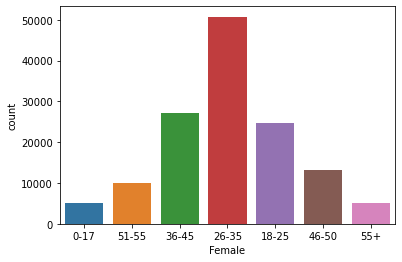

In [41]:
sns.countplot(df[df['Gender']=='F']['Age'])
plt.xlabel('Female')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

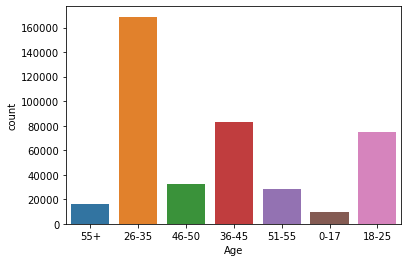

In [42]:
sns.countplot(df[df['Gender']=='M']['Age'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

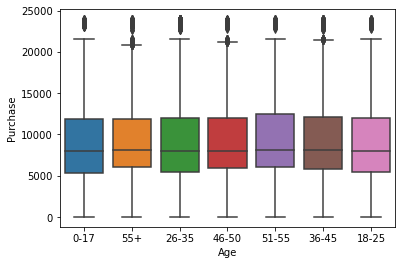

In [43]:
sns.boxplot(x=df['Age'],y=df['Purchase'])

<AxesSubplot:xlabel='Occupation'>

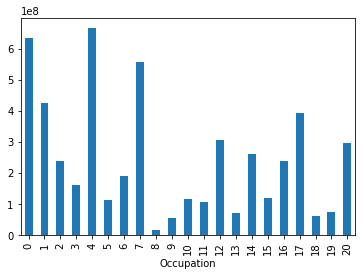

In [54]:
df.groupby('Occupation')['Purchase'].sum().plot(kind = 'bar')

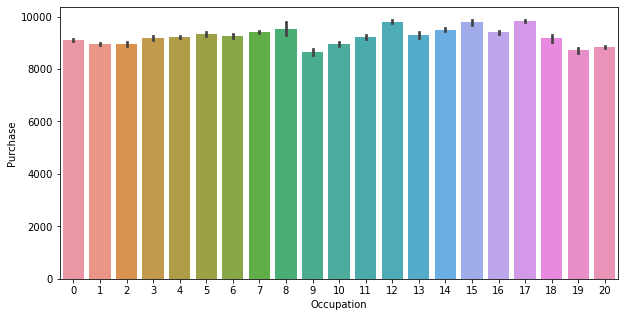

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Occupation'],y=df['Purchase'])
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

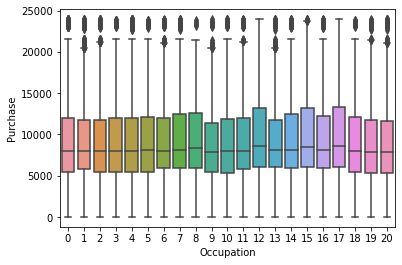

In [45]:
sns.boxplot(x='Occupation',y='Purchase',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

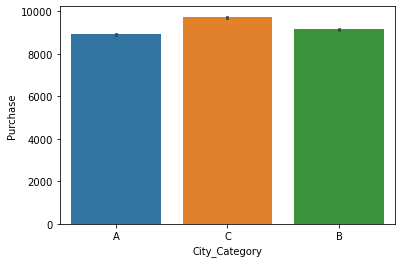

In [46]:
sns.barplot(x='City_Category',y='Purchase',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

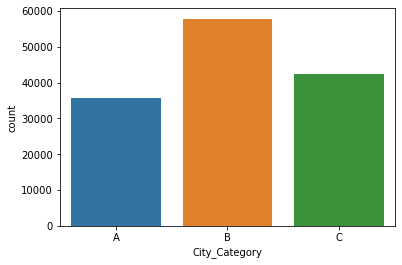

In [47]:
sns.countplot(df[df['Gender']=='F']['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

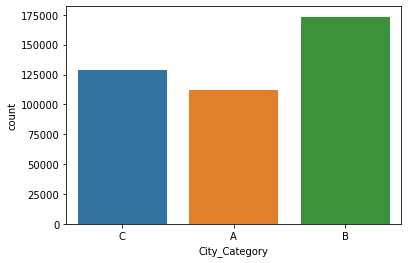

In [48]:
sns.countplot(df[df['Gender']=='M']['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

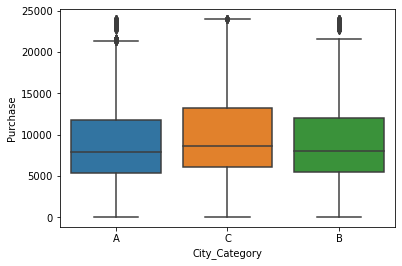

In [49]:
sns.boxplot(x='City_Category',y='Purchase',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

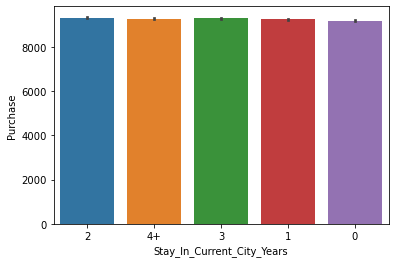

In [50]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

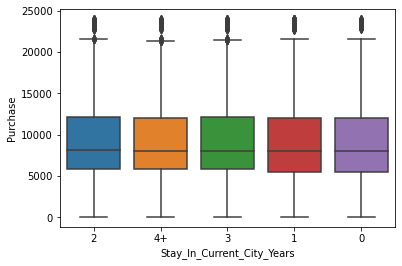

In [51]:
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

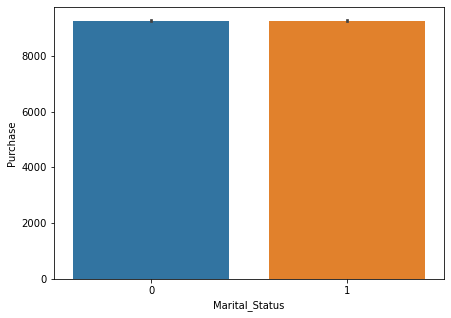

In [52]:
plt.figure(figsize=(7,5))
sns.barplot(x='Marital_Status',y='Purchase',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

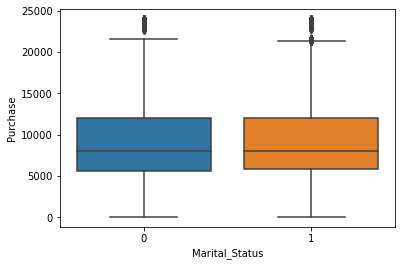

In [53]:
sns.boxplot(x=df['Marital_Status'],y=df['Purchase'])

In [60]:
def visual_bar_box(feature1,feature2):
    plt.figure(figsize=(7,5))
    sns.barplot(feature1,feature2)
    plt.show()
    sns.boxplot(feature1,feature2)
    plt.show()

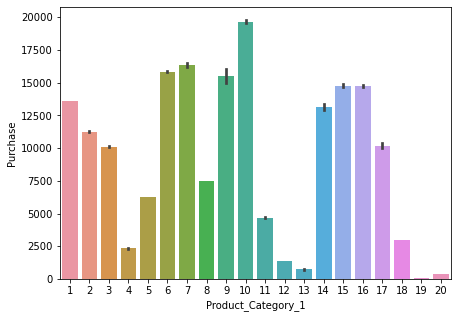

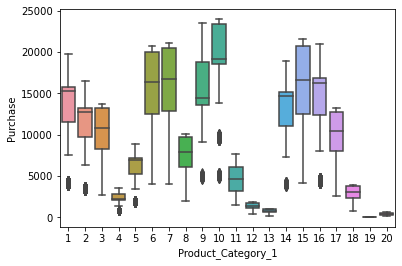

In [61]:
visual_bar_box(df['Product_Category_1'],df['Purchase'])

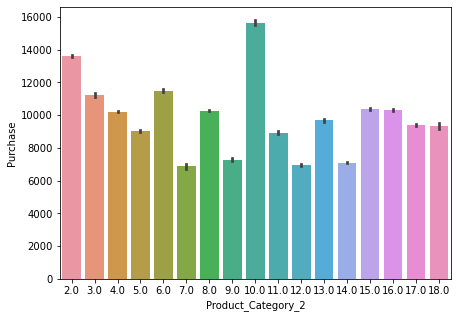

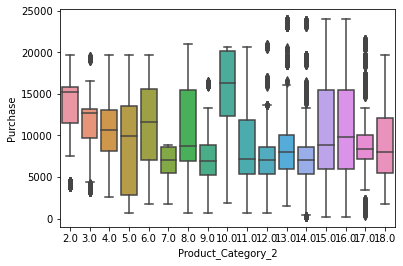

In [62]:
visual_bar_box(df['Product_Category_2'],df['Purchase'])

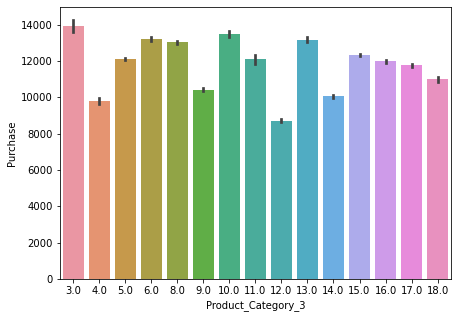

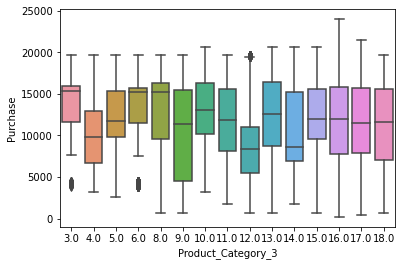

In [63]:
visual_bar_box(df['Product_Category_3'],df['Purchase'])

**Multi-Variate Analysis**

In [ ]:
df.columns

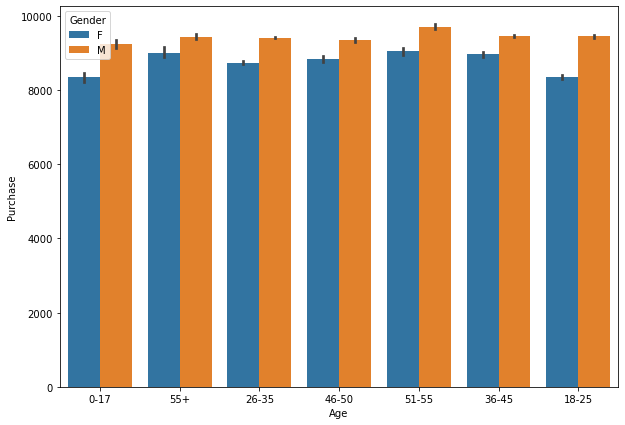

In [64]:
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender')
plt.show()

* In all Age Group,Males purchasing power is more than Females.

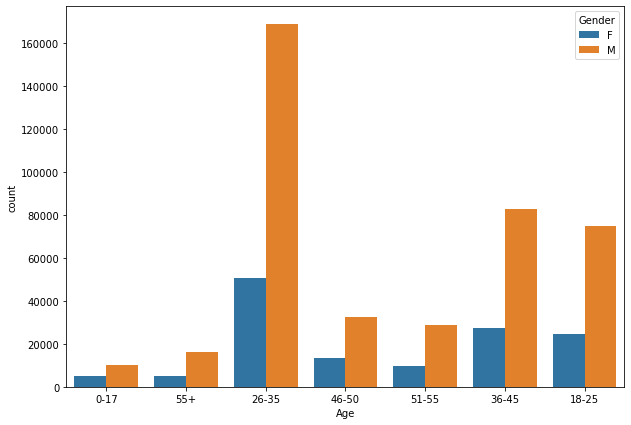

In [65]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Age'],hue=df['Gender'])
plt.show()

* The Number of Female Buyers are higher in every Age Group.

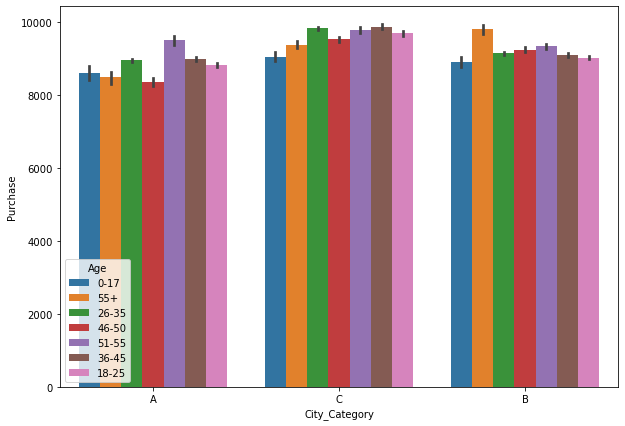

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['City_Category'],y=df['Purchase'],hue=df['Age'])
plt.show()

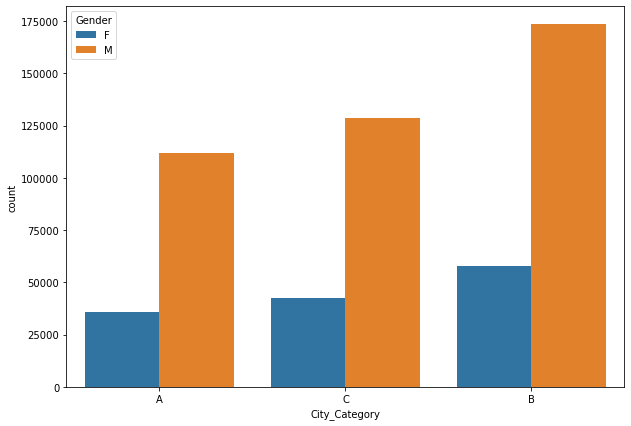

In [67]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['City_Category'],hue=df['Gender'])
plt.show()

* In Each City_Category,Female Buyers are higher in Number.

# Feature Engineering

**Outlier Removal**

In [68]:
# Will use the Trimming Method to Remove the Outliers from Purchase Feature
# Firstly I need to find the iqr

q1 = np.percentile(df['Purchase'],25,interpolation='midpoint')
q3 = np.percentile(df['Purchase'],75,interpolation='midpoint')
iqr = q3-q1
maximum = q3 + 1.5*iqr
df = df[df['Purchase']<=maximum]

In [69]:
# Dropping the Columns
df = df.drop(columns=['User_ID','Product_ID'],axis=1)

In [70]:
# Mapping the Age with the Discrete Value
df['Age']=df['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [71]:
df=pd.get_dummies(df,columns=['City_Category','Gender']) # One hot encoding 

In [72]:
df.describe()

,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M
count,547391.000000,547391.000000,547391.000000,547391.000000,374165.000000,166180.000000,547391.000000,547391.000000,547391.000000,547391.000000,547391.000000,547391.000000
mean,2.494630,8.074627,0.409486,5.378945,9.814082,12.655350,9195.627195,0.268612,0.420383,0.311004,0.247026,0.752974
std,1.352682,6.521586,0.491739,3.927383,5.087949,4.128044,4938.872953,0.443238,0.493621,0.462905,0.431283,0.431283
min,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5721.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8038.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12019.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,20.000000,1.000000,20.000000,18.000000,18.000000,21399.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#Filling the Nan Values of Product_Category_2 and Product_Category_3 with Median

df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace=True)

In [75]:
df.isnull().sum()

Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            381211
Purchase                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
Gender_F                           0
Gender_M                           0
dtype: int64

In [76]:
df = df.drop(columns=['Product_Category_3'])

In [77]:
df=pd.get_dummies(df,columns=['Stay_In_Current_City_Years'])

In [78]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [79]:
#Checking the Dtype of all Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Age                            547391 non-null  int64
 1   Occupation                     547391 non-null  int64
 2   Marital_Status                 547391 non-null  int64
 3   Product_Category_1             547391 non-null  int64
 4   Product_Category_2             547391 non-null  int32
 5   Purchase                       547391 non-null  int64
 6   City_Category_A                547391 non-null  uint8
 7   City_Category_B                547391 non-null  uint8
 8   City_Category_C                547391 non-null  uint8
 9   Gender_F                       547391 non-null  uint8
 10  Gender_M                       547391 non-null  uint8
 11  Stay_In_Current_City_Years_0   547391 non-null  uint8
 12  Stay_In_Current_City_Years_1   547391 non-null  uint8
 13 

In [80]:
# Checking the Null Values
df.isna().sum()

Age                              0
Occupation                       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Purchase                         0
City_Category_A                  0
City_Category_B                  0
City_Category_C                  0
Gender_F                         0
Gender_M                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

**Splitting the Data**

In [81]:
X=df.drop(columns=['Purchase'])
y=df['Purchase']

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
X_train.head()

,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
538859,3,0,1,1,8,1,0,0,0,1,0,1,0,0,0
219651,2,15,0,3,4,0,0,1,0,1,0,1,0,0,0
524297,0,10,0,1,2,0,1,0,1,0,0,0,1,0,0
54967,2,0,1,5,14,0,1,0,0,1,0,0,0,1,0
189098,3,12,1,5,9,0,1,0,0,1,0,0,1,0,0


**Feature Selection**

In [84]:
X=X_train
y=y_train

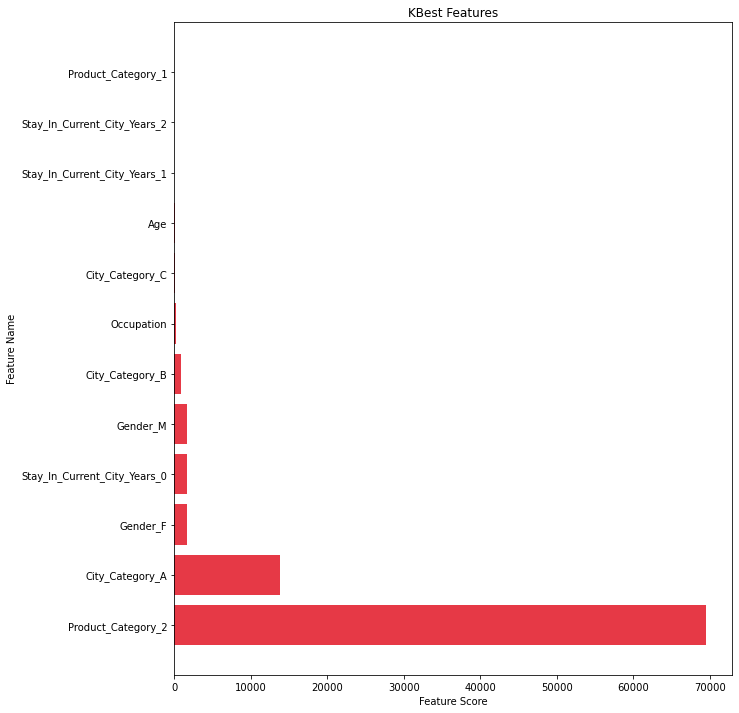

In [85]:
# Using the Annova Test and SelectKBest to get the Best Features
skb=SelectKBest(f_regression,k=12)
KBest_features=skb.fit(X,y)

mask=KBest_features.get_support(True)
names=[]
for i in mask:
    names.append(X.columns[i])

scores=skb.scores_
named_scores=zip(names,scores)
sorted_named_scores=sorted(named_scores,key=lambda z: z[1],reverse=True)

sorted_scores=[score[1] for score in sorted_named_scores]
sorted_names=[name[0] for name in sorted_named_scores]

y_pos=np.arange(len(names))

plt.figure(figsize=(10,12))
plt.barh(y_pos,sorted_scores,height=0.8,align='center',tick_label=sorted_names,color='#E63946')
plt.yticks(y_pos)
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('KBest Features');

In [86]:
X_train = X_train[names]
X_test = X_test[names]

In [87]:
X_train.shape

(437912, 12)

In [88]:
X_test.shape

(109479, 12)

**PreProcessing the Data**

In [89]:
sr = StandardScaler()
X_train=sr.fit_transform(X_train)
X_test = sr.transform(X_test)

# Model Selection 

In [90]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
pred_y=lr.predict(X_test)
print(r2_score(y_test,pred_y))

0.14601737253507663


In [92]:
las = Lasso()
las.fit(X_train,y_train)

Lasso()

In [93]:
y_pred = las.predict(X_test)
print(r2_score(y_test,y_pred))

0.14602028482367668


**Conclusion**
* The Independent Features are very Highly correlated with the Target Value.
* The Accuracy is not Good but can be improved with the help of HyperParameter Tuning.